In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api as sm
import statistics
import datetime

# 1. DATA PREPARING

In [77]:
air_in = pd.read_csv('air_in_year_month.csv')

In [78]:
air_in.head()

,Unnamed: 0,YY,MM,DD,ST,PL,MD,DU,TSP,Q_TSP,...,NO2,Q_NO2,NO,Q_NO,Примечание,с аэрозол,Unnamed: 25,Unnamed: 26,Unnamed: 27,y_m
0,0,83.0,12.0,6.0,4.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,мг/г,NaN,NaN,NaN,1983-12-06
1,1,83.0,12.0,7.0,4.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-07
2,2,83.0,12.0,8.0,4.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-08
3,3,83.0,12.0,9.0,4.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-09
4,4,83.0,12.0,10.0,4.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-12-10


In [90]:
temp_df = air_in[['YY', 'MM', 'TSP', 'SO2', 'SO4', 'NO2']]

In [2]:
air_columns = ['TSP', 'SO2', 'SO4', 'NO2']

In [92]:
data = {'TSP': [], 'SO2': [], 'SO4': [], 'NO2': [], 'date': [], 'YY': [], 'MM': []}

In [93]:
for year in temp_df.YY.unique():
    for month in temp_df.MM.unique():
        ym_condition = (temp_df.MM == month) & (temp_df.YY == year)
        prev_year_condition = (temp_df.MM == month) & (temp_df.YY == year - 1)
        year_df = ts_df[ym_condition].copy()
        prev_df = ts_df[prev_year_condition].copy()
        for column in air_columns:
            ts = year_df[column].dropna()
            ts_prev = prev_df[column].dropna()
            if ts.shape[0] > 0:
                mean_value = ts.mean()
                data[column].append(mean_value)
            elif ts_prev.shape[0] > 0:
                mean_value = ts_prev.mean()
                data[column].append(mean_value)
            elif len(data[column]) >= 12:
                data[column].append(data[column][-12])
            elif len(data[column]) > 0:
                data[column].append(statistics.mean(data[column]))
            else:
                data[column].append(0.)
                
        if year > 50:
            year_transformed = int(year) + 1900
        else:
            year_transformed = int(year) + 2000

        d = datetime.date(year_transformed, int(month), 1)
        data['date'].append(d)
        data['YY'].append(int(year))
        data['MM'].append(int(month))

In [94]:
prepared_df = pd.DataFrame.from_dict(data)

In [96]:
prepared_df.to_csv('prepared.csv', index=False)

In [95]:
prepared_df.head()

,TSP,SO2,SO4,NO2,date,YY,MM
0,0.0,0.0,0.0,0.0,1983-12-01,83,12
1,0.0,0.0,0.0,0.0,1983-01-01,83,1
2,0.0,0.0,0.0,0.0,1983-02-01,83,2
3,0.0,0.0,0.0,0.0,1983-03-01,83,3
4,0.0,0.0,0.0,0.0,1983-04-01,83,4


# READING DATAFRAME

In [2]:
prepared_df = pd.read_csv('prepared.csv')

In [3]:
prepared_df.head()

,TSP,SO2,SO4,NO2,date,YY,MM
0,0.0,0.0,0.0,0.0,1983-12-01,83,12
1,0.0,0.0,0.0,0.0,1983-01-01,83,1
2,0.0,0.0,0.0,0.0,1983-02-01,83,2
3,0.0,0.0,0.0,0.0,1983-03-01,83,3
4,0.0,0.0,0.0,0.0,1983-04-01,83,4


In [4]:
prepared_df['date'] = pd.to_datetime(prepared_df['date'])
prepared_df = prepared_df.set_index('date')

In [5]:
prepared_df.head()

,TSP,SO2,SO4,NO2,YY,MM
date,,,,,,
1983-12-01,0.0,0.0,0.0,0.0,83,12
1983-01-01,0.0,0.0,0.0,0.0,83,1
1983-02-01,0.0,0.0,0.0,0.0,83,2
1983-03-01,0.0,0.0,0.0,0.0,83,3
1983-04-01,0.0,0.0,0.0,0.0,83,4


# 2. ARIMA

In [6]:
air_columns = ['TSP', 'SO2', 'SO4', 'NO2']

In [7]:
prepared_df.head()

,TSP,SO2,SO4,NO2,YY,MM
date,,,,,,
1983-12-01,0.0,0.0,0.0,0.0,83,12
1983-01-01,0.0,0.0,0.0,0.0,83,1
1983-02-01,0.0,0.0,0.0,0.0,83,2
1983-03-01,0.0,0.0,0.0,0.0,83,3
1983-04-01,0.0,0.0,0.0,0.0,83,4


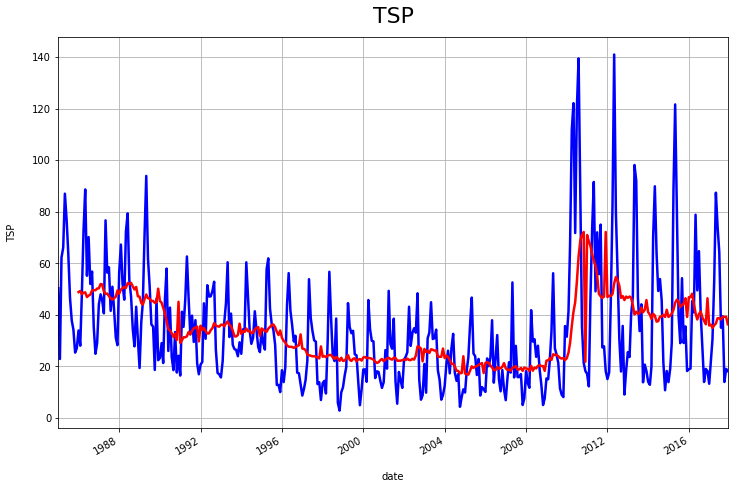

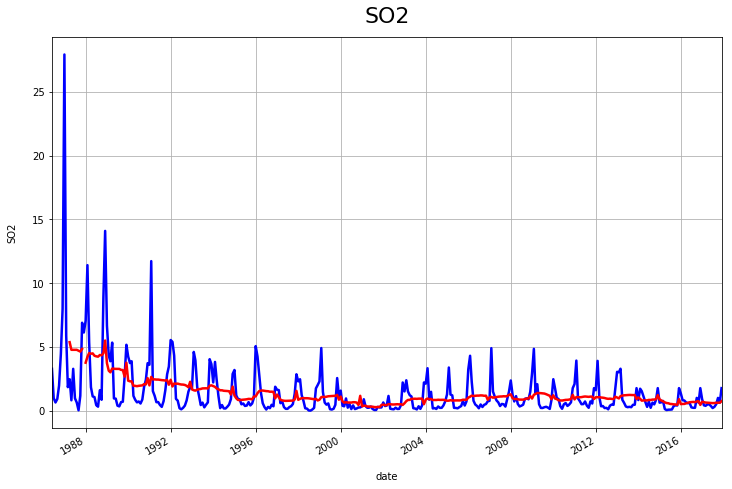

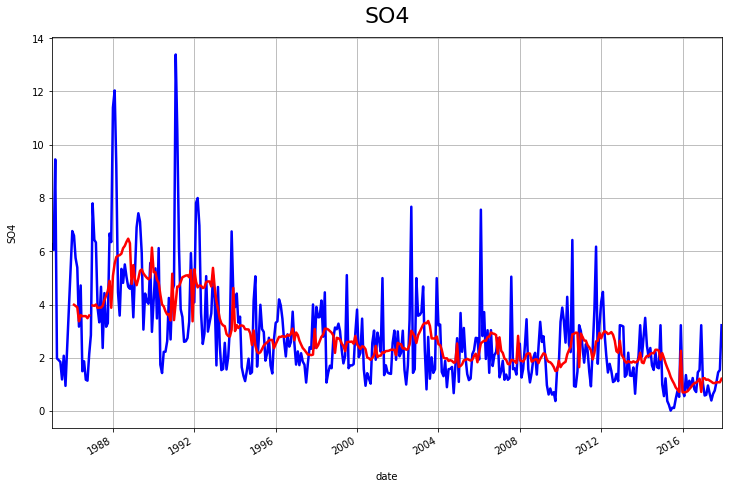

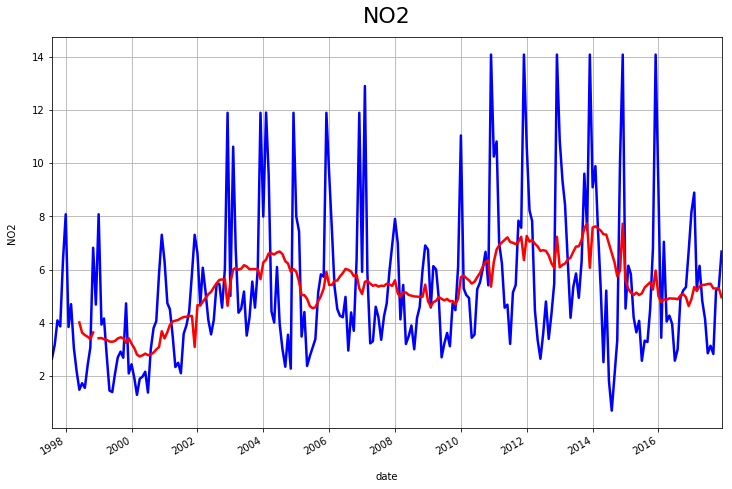

In [8]:
for column in air_columns:
    plt.figure(figsize=(12,8))
    prepared_df[prepared_df[column] != 0.0][column].plot(figsize=(12, 8), linewidth=2.5, color='blue')
    prepared_df[prepared_df[column] != 0.0][column].rolling(window=12).mean().plot(figsize=(12, 8), linewidth=2.5, color='red')
    plt.xlabel("date", labelpad=15)
    plt.ylabel(column, labelpad=15)
    plt.title(column, y=1.02, fontsize=22);
    plt.grid()

In [9]:
import sys
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
#DICKEY FULLER TEST

In [11]:
def tsplot(y, lags=None, figsize=(12, 4), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
#         layout = (2, 2)
#         ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#         acf_ax = plt.subplot2grid(layout, (1, 0))
#         pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot()
        plt.title('Time Series Analysis Plots\n Критерий Дики-Фуллера: p={:.2f}'.format(sm.tsa.stattools.adfuller(y)[1]))
#         smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
#         smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
        fig.savefig('log_diff_data.png', dpi=fig.dpi)
    return 

Критерий Дики-Фуллера: p=0.000000
Критерий Дики-Фуллера: p=0.000000
Критерий Дики-Фуллера: p=0.000000
Критерий Дики-Фуллера: p=0.000000


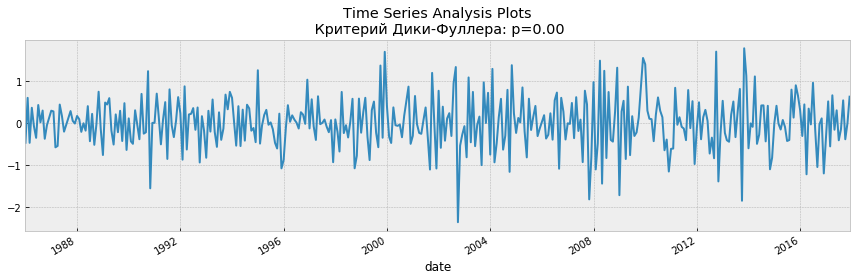

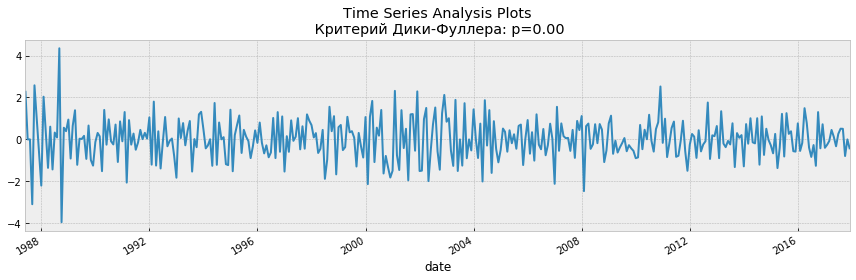

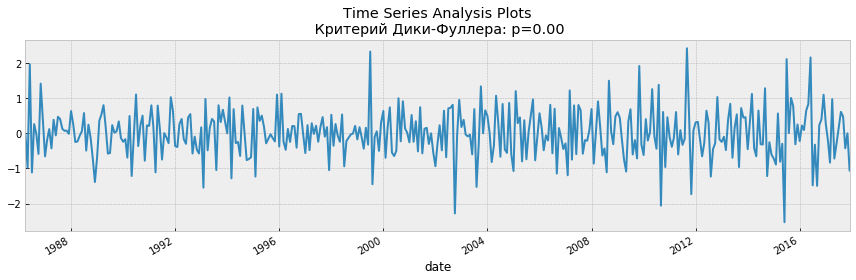

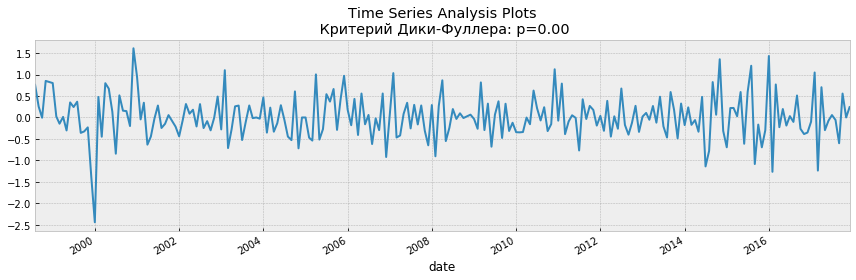

In [12]:
for column in air_columns:
    tsplot(np.log(prepared_df[prepared_df[column] != 0.0][column]).diff(12).diff().dropna(), lags=30)

In [23]:
test_size=24
# train, test = train_test_split(prepared_df['TSP'], test_size=test_size)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=541.924, BIC=557.716, Time=0.729 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=710.995, BIC=718.891, Time=0.095 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=569.654, BIC=585.446, Time=0.493 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=386.821, BIC=402.613, Time=1.628 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=708.995, BIC=712.943, Time=0.032 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=562.520, BIC=574.364, Time=0.197 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=385.576, BIC=405.316, Time=2.729 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=385.049, BIC=404.789, Time=4.919 seconds
Near non-invertible r

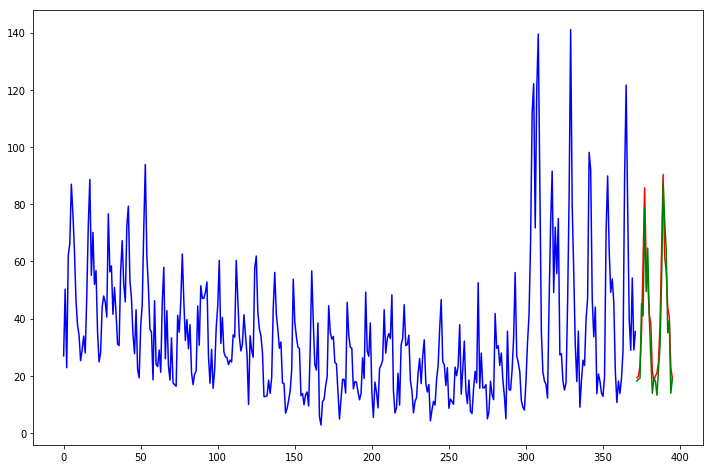

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=891.111, BIC=906.722, Time=0.989 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=1039.537, BIC=1047.342, Time=0.232 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=868.122, BIC=883.732, Time=0.547 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=740.898, BIC=756.508, Time=1.001 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=1037.551, BIC=1041.453, Time=0.027 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=914.167, BIC=925.875, Time=0.144 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=742.693, BIC=762.206, Time=2.177 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=742.685, BIC=762.198, Time=4.344 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=824.555, BIC=840.166, Time=0.702 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=744.752, BIC=768.167, T

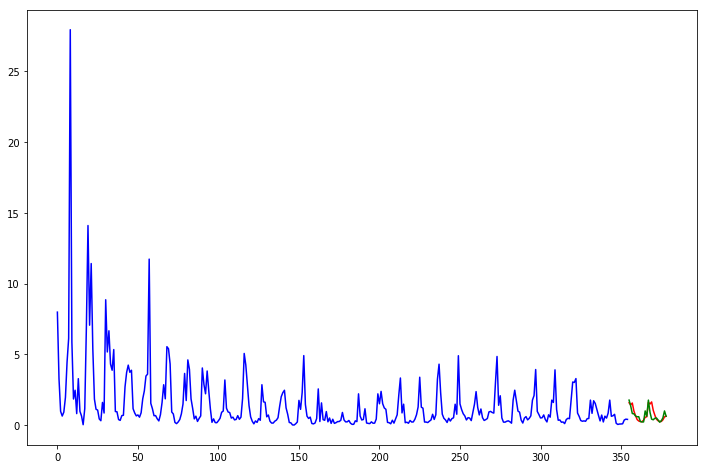

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=714.980, BIC=730.740, Time=0.823 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=799.554, BIC=807.435, Time=0.148 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=693.113, BIC=708.874, Time=0.458 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=565.334, BIC=581.095, Time=1.265 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=797.554, BIC=801.494, Time=0.045 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=767.980, BIC=779.801, Time=0.100 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=636.384, BIC=656.085, Time=1.474 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=592.966, BIC=616.607, Time=3.757 seconds
Near non-invertible r

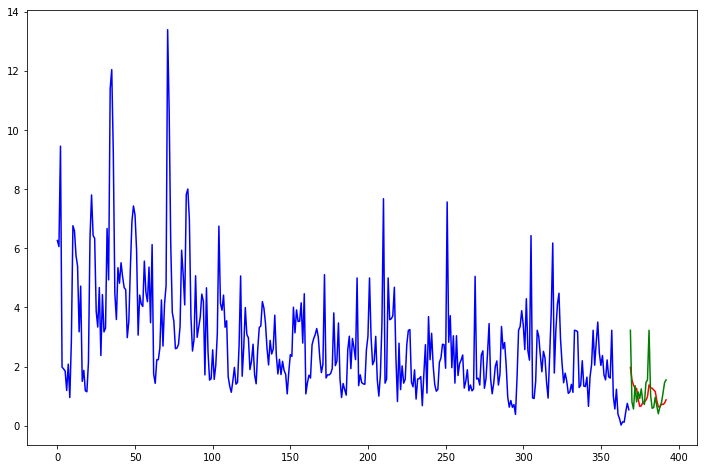

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=275.325, BIC=289.112, Time=0.456 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=352.403, BIC=359.296, Time=0.063 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=266.043, BIC=279.830, Time=0.385 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=183.039, BIC=196.826, Time=1.827 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=350.430, BIC=353.877, Time=0.027 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=309.622, BIC=319.962, Time=0.097 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=243.581, BIC=260.815, Time=1.118 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=215.739, BIC=236.419, Time=5.355 seconds
Near non-invertible r

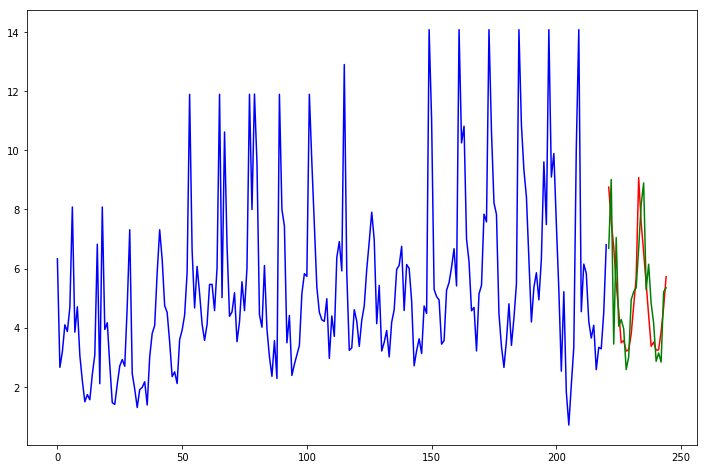

In [24]:
resid_model_dict = dict()
resid_forecast_dict = dict()
mae_dict = dict()
summary_dict = dict()
forecast_d = dict()
train_d = dict()
test_d = dict()
model_d = dict()

for column in air_columns:
    train, test = train_test_split(np.log(prepared_df[prepared_df[column] != 0.0][column]), test_size=test_size)
    model = pm.auto_arima(np.log(prepared_df[prepared_df[column] != 0.0][column]), start_p=1, start_q=1,
                       max_p=3, max_q=3, m=12,
                       start_P=0, start_Q=0, seasonal=True,
                       d=1, D=1, trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True);
    forecasts = model.predict(test.shape[0])
    plt.figure(figsize=(12,8))
    x = np.arange(np.log(prepared_df[prepared_df[column] != 0.0][column]).shape[0])
    plt.plot(x[-test_size:], np.exp(forecasts), c='red', label='forecast')
    plt.plot(x[-test_size:], np.exp(test), c='green', label='test')
    plt.plot(x[:-test_size], np.exp(train), c='blue', label='train')
    plt.show()
    
    mae_dict[column] = mean_absolute_error(forecasts, test)
    resid_model_dict[column] = model.resid()
    resid_forecast_dict[column] = forecasts - test 
    summary_dict = model.summary()
    test_d[column] = test
    train_d[column] = train
    forecast_d[column] = forecasts
    model_d[column] = model
    
    
    non_null_len = len(train)
    resids = []
    i = 0
    r_j = 0
    while non_null_len > 0:
        if prepared_df[column].iloc[i] == 0.:
            resids.append(0.)
        elif non_null_len == len(train):
            resids.append(0.)
            non_null_len -= 1
        else:
            resids.append(resid_model_dict[column][r_j])
            r_j += 1
            non_null_len -= 1
            
            
        i += 1
    
    for i in range(test_size):
        resids.append(0.)
#         non_null_len -= 1
    
    prepared_df[column + '_' + 'resid'] = resids
        

In [ ]:
prepared_df.to_csv('prepared_resids.csv')

In [25]:
# from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
for column in air_columns:
    print(column, 'MAE', mean_absolute_error(np.exp(forecast_d[column]), np.exp(test_d[column])))

TSP MAE 6.443210336594412
SO2 MAE 0.2509752498479824
SO4 MAE 0.478789390826926
NO2 MAE 1.0299806379621312


In [27]:
for column in air_columns:
    print(column, 'MSE', mean_squared_error(np.exp(forecast_d[column]), np.exp(test_d[column])))

TSP MSE 63.649900984729264
SO2 MSE 0.14712769198919576
SO4 MSE 0.40149418875325776
NO2 MSE 1.7339319973992975


In [28]:
for column in air_columns:
    print(column, 'MAPE', mean_absolute_percentage_error(np.exp(forecast_d[column]), np.exp(test_d[column])))

TSP MAPE 16.48642518003244
SO2 MAPE 31.915026113700804
SO4 MAPE 44.564951930572974
NO2 MAPE 19.702456977875226


# 3. XGBOOST

In [29]:
import xgboost

In [30]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [31]:
prepared_df.head()

,TSP,SO2,SO4,NO2,YY,MM,TSP_resid,SO2_resid,SO4_resid,NO2_resid
date,,,,,,,,,,
1983-12-01,0.0,0.0,0.0,0.0,83,12,0.0,0.0,0.0,0.0
1983-01-01,0.0,0.0,0.0,0.0,83,1,0.0,0.0,0.0,0.0
1983-02-01,0.0,0.0,0.0,0.0,83,2,0.0,0.0,0.0,0.0
1983-03-01,0.0,0.0,0.0,0.0,83,3,0.0,0.0,0.0,0.0
1983-04-01,0.0,0.0,0.0,0.0,83,4,0.0,0.0,0.0,0.0


In [32]:
def prepareData(data, column, lag_start=1, lag_end=12, test_size=0.15):
    test_index = int(len(data)*(1-test_size))
#     test_index = int()
    test_index = len(data) - 24
#     print(test_index)
#     print(len(data))
    data = pd.DataFrame(data.copy())
#     data.columns = ['TSP']
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data[column].shift(i)

#     data.index = data.index.to_datetime()
#     data["MM"] = data.index.weekday

    # считаем средние только по тренировочной части, чтобы избежать лика
#     map(code_mean(data[:test_index], 'MM', "TSP").get, data.MM)
    data['month_average'] = list(map(code_mean(data[:test_index], 'MM', column).get, data.MM))
#     data["hour_average"] = map(code_mean(data[:test_index], 'hour', "y").get, data.hour)

    # выкидываем закодированные средними признаки 
#     data.drop(["hour", "weekday"], axis=1, inplace=True)
    data.drop(["YY", "MM"], axis=1, inplace=True)
#     data = data.dropna()
    data = data.reset_index(drop=True)
    
#     print(data.shape[0])

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop([column], axis=1)
    y_train = data.loc[:test_index][column]
    X_test = data.loc[test_index:].drop([column], axis=1)
    y_test = data.loc[test_index:][column]
    

    return X_train, X_test, y_train, y_test

In [33]:
def fair_obj(preds, dtrain):
    fair_constant = 2
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

In [34]:
forecast_xgb = dict()
xgb_d = dict()
for column in air_columns:
    temp_data = prepared_df[[column + '_resid', 'YY', 'MM']].copy()
    combine_data = temp_data[temp_data[column + '_resid'] != 0]
#     for i in range(24, -1, -1):
#         temp_data[column + '_resid'][i] = np.nan
    combine_data = combine_data.append(temp_data.iloc[-24:])
    X_train, X_test, y_train, y_test = prepareData(combine_data, column + '_resid', test_size=0.15, lag_start=1, lag_end=48)
#     X_train.fillna(0, inplace=True)
    xgb = xgboost.XGBRegressor(n_estimators=180, learning_rate=0.07, max_depth=4, gamma=0.1, reg_lambda=0.1)
    xgb.fit(X_train,y_train)
    forecast_xgb[column] = xgb.predict(X_test)
    xgb_d[column] = xgb

In [35]:
for column in air_columns:
    print(column, 'MAE', mean_absolute_error(np.exp(forecast_d[column] + forecast_xgb[column]), np.exp(test_d[column].values)))

TSP MAE 7.696760851635095
SO2 MAE 0.3492346920031069
SO4 MAE 0.4676842464672129
NO2 MAE 0.9809874678284695


In [36]:
for column in air_columns:
    print(column, 'MSE', mean_squared_error(forecast_d[column] + forecast_xgb[column], test_d[column].values))

TSP MSE 0.07214242620670512
SO2 MSE 0.31140844229684345
SO4 MSE 0.2604978790504499
NO2 MSE 0.0626962559682464


In [37]:
for column in air_columns:
    print(column, 'MAPE', mean_absolute_percentage_error(np.exp(forecast_d[column] + forecast_xgb[column]), np.exp(test_d[column])))

TSP MAPE 17.67996666074576
SO2 MAPE 41.866767502715604
SO4 MAPE 43.01908479088307
NO2 MAPE 20.57807479993525


# 4. RANDOM FORREST 

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
forecast_rf = dict()
rf_d = dict()
for column in air_columns:
    temp_data = prepared_df[[column + '_resid', 'YY', 'MM']].copy()
    combine_data = temp_data[temp_data[column + '_resid'] != 0]
    combine_data = combine_data.append(temp_data.iloc[-24:])
    X_train, X_test, y_train, y_test = prepareData(combine_data, column + '_resid', test_size=0.15, lag_start=1, lag_end=48)
    rf = RandomForestRegressor(n_estimators=200, criterion='mae', max_depth=4, n_jobs=300, ccp_alpha=0.1)
    X_train.fillna(0, inplace=True)
    y_train.fillna(0, inplace=True)
    rf.fit(X_train,y_train)
    forecast_rf[column] = rf.predict(X_test)
    rf_d[column] = rf

In [41]:
for column in air_columns:
    print(column, 'MAE', mean_absolute_error(np.exp(forecast_d[column] + forecast_rf[column]), np.exp(test_d[column].values)))

TSP MAE 6.673044938464348
SO2 MAE 0.2559353222418608
SO4 MAE 0.4783945895742046
NO2 MAE 1.0367828734350002


In [42]:
for column in air_columns:
    print(column, 'MSE', mean_squared_error(forecast_d[column] + forecast_rf[column], test_d[column].values))

TSP MSE 0.056961128964646696
SO2 MSE 0.22727023094235013
SO4 MSE 0.24051264859149413
NO2 MSE 0.0598378897751351


In [43]:
for column in air_columns:
    print(column, 'MAPE', mean_absolute_percentage_error(np.exp(forecast_d[column] + forecast_rf[column]), np.exp(test_d[column])))

TSP MAPE 16.92028080360614
SO2 MAPE 30.876448885138636
SO4 MAPE 44.243370948120884
NO2 MAPE 18.955210646319877


# 4. FINAL PLOTS

# timeseries plots:

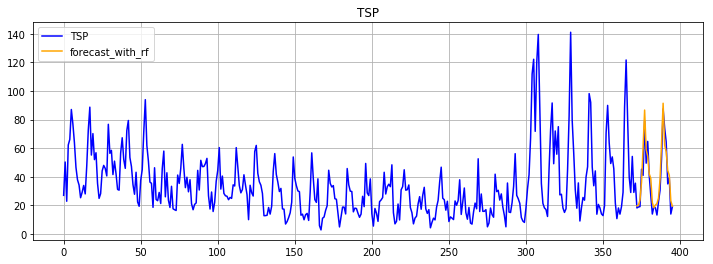

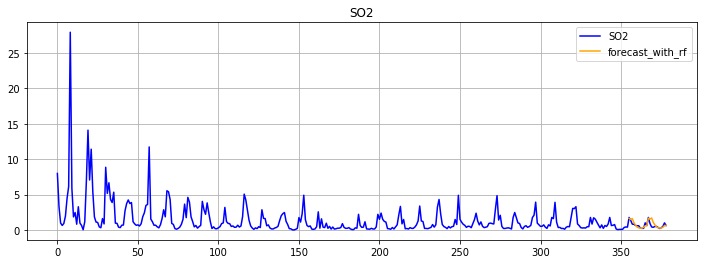

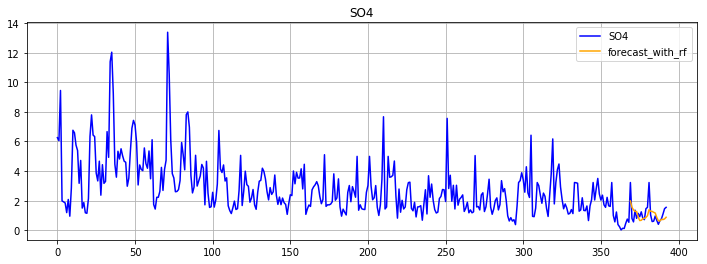

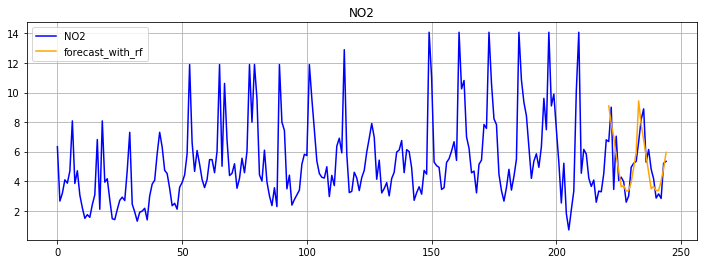

In [52]:
for column in air_columns:
    plt.figure(figsize=(12,4))
    x = np.arange(np.log(prepared_df[prepared_df[column] != 0.0][column]).shape[0])
#     plt.plot(x[-24:], np.exp(test_d[column]), c='green', label='test')
    plt.plot(x, np.exp(train_d[column]).append(np.exp(test_d[column])), c='blue', label=column)
#     plt.plot(x[-24:], np.exp(forecast_d[column]), c='red', label='forecast_with_arima')
    plt.plot(x[-24:], np.exp(forecast_d[column] + forecast_rf[column]), c='orange', label='forecast_with_rf')
    plt.title(column)
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig(column+'_forecast_rf.png')
#     savefig('log_diff_data.png', dpi=fig.dpi)
    plt.show()

# DICKEY FULLER TEST

# RESIDUALS ANALYSIS

In [57]:
import scipy
import sklearn
from sklearn.mixture import GaussianMixture as gm
from sklearn.mixture import BayesianGaussianMixture as bgm
from scipy import integrate
from scipy.stats import chisquare

In [58]:
residuals_df = pd.read_csv('prepared_resids.csv')

In [59]:
residuals_df.head()

,date,TSP,SO2,SO4,NO2,YY,MM,TSP_resid,SO2_resid,SO4_resid,NO2_resid
0,1983-12-01,0.0,0.0,0.0,0.0,83,12,0.0,0.0,0.0,0.0
1,1983-01-01,0.0,0.0,0.0,0.0,83,1,0.0,0.0,0.0,0.0
2,1983-02-01,0.0,0.0,0.0,0.0,83,2,0.0,0.0,0.0,0.0
3,1983-03-01,0.0,0.0,0.0,0.0,83,3,0.0,0.0,0.0,0.0
4,1983-04-01,0.0,0.0,0.0,0.0,83,4,0.0,0.0,0.0,0.0


In [61]:
from scipy.stats import norm
def gmm_pdf(x, ncomp, weights, means, sigmas):
    fun = 0
    for i in range(ncomp):
        fun += weights[i] * norm.pdf(x, means[i], sigmas[i])
    return fun

shapiro_wilk:  0.010277657769620419
kstest 0.2722798916776375
0.39349136957691605
chisquare:  3.9632104330879295e-21
shapiro_wilk:  0.00640689954161644
kstest 0.29773400595705196
0.6656190545530404
chisquare:  3.2487143889497802e-21
shapiro_wilk:  2.475247811162262e-07
kstest 0.08560439204338455
0.5116726218815246
chisquare:  7.669158211413176e-36
shapiro_wilk:  1.1150886166433338e-05
kstest 0.21081754388412588
0.3498716248174762
chisquare:  6.2650879021604e-09


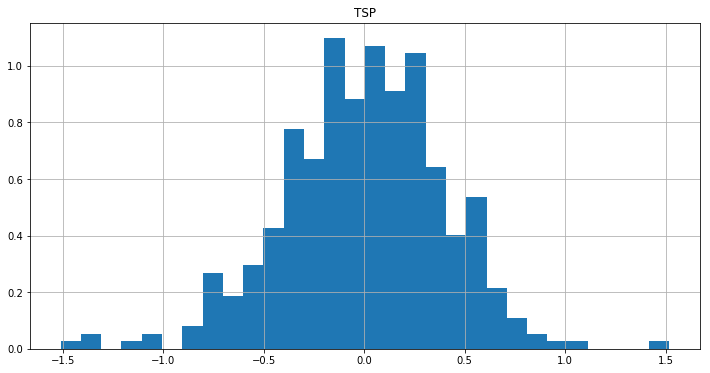

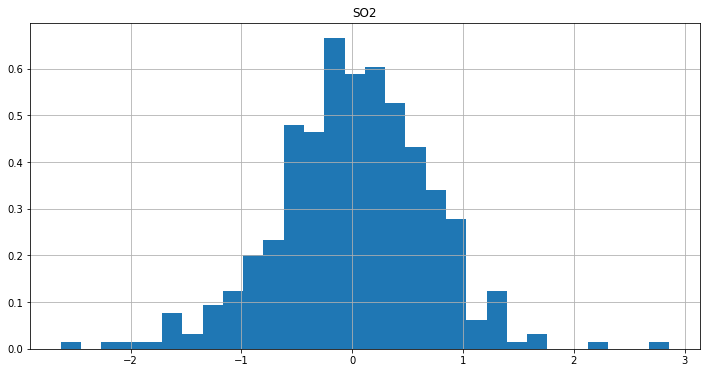

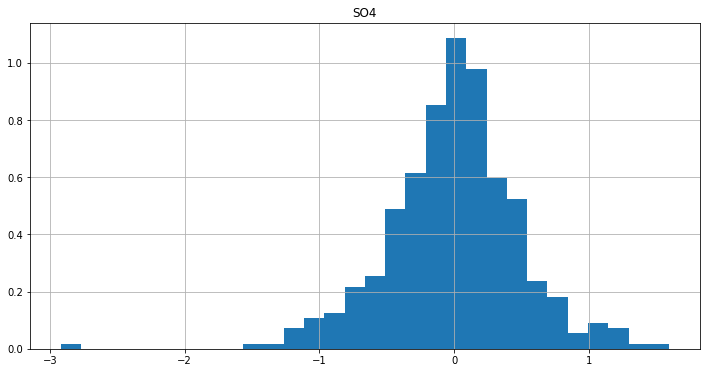

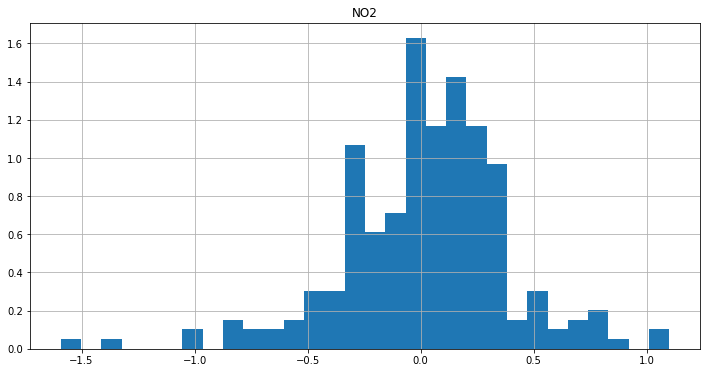

In [63]:
#Test statistics for residuals
for column in air_columns:
    plt.figure(figsize=(12, 6))
    data = residuals_df[residuals_df[column+'_resid'] != 0][column + '_resid'][1:]
    sampled_data = data.sample(frac=1)
    train_half = sampled_data[:len(data)//2]
    test_half = sampled_data[len(data)//2:]
    (n, bins, patches) = plt.hist(data, density=True, bins=30);
    plt.title(column);
#     print('ljung_box:', sm.stats.acorr_ljungbox(data, lags=[30])[1][0])
    params_normal = scipy.stats.norm.fit(train_half)
    print('shapiro_wilk: ', scipy.stats.shapiro(data)[1])
    print('kstest', scipy.stats.kstest(test_half, 'norm', args=params_normal).pvalue)
    f_exp = []
#     print(params_normal)
    print(params_normal[1])
    fun = lambda x: gmm_pdf(x, ncomp=1, weights=[1.0], means=[[params_normal[0]]], sigmas=[[params_normal[1]]])
    for i in range(len(bins)-1):
        f_exp.append(integrate.quad(fun, bins[i], bins[i+1])[0]*len(test_half))
        
    print('chisquare: ', chisquare(n, f_exp).pvalue)
    plt.grid(True)

# Mixtures GMM(parametrs compute on em_algorithm.r script)

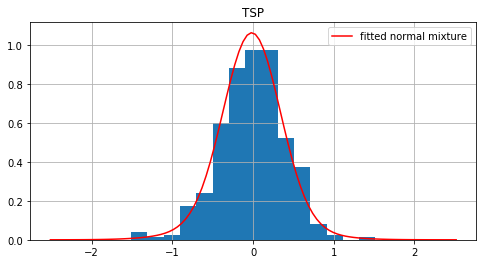

In [67]:
column = 'TSP'
data = residuals_df[residuals_df[column+'_resid'] != 0][column + '_resid'][1:]
sampled_data = data.sample(frac=1)
train_gm = sampled_data[:len(sampled_data)//2]
test_gm = sampled_data[len(sampled_data) // 2:]

fun = lambda x: gmm_pdf(x, ncomp=2, weights=[0.1443827, 0.8556173],
                            means=[[-0.07], [-0.014661567]],
                            sigmas=[[0.64], [0.35]])

points = np.linspace(data.min() - 1, data.max() + 1,num=100)
plt.figure(figsize=(8, 4))
plt.hist(sampled_data, bins=15, density=True);
plt.plot(points, fun(points), color='r', label='fitted normal mixture')
plt.title(column)
plt.legend(loc='best')
plt.savefig(column+'_histogram.png')
plt.grid(True)

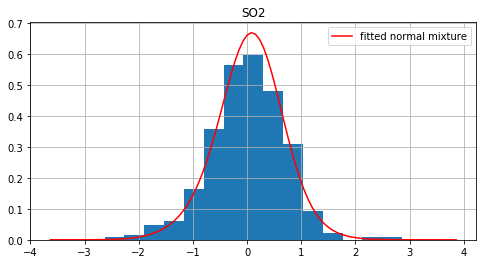

In [68]:
column = 'SO2'
data = residuals_df[residuals_df[column+'_resid'] != 0][column + '_resid'][1:]
sampled_data = data.sample(frac=1)
train_gm = sampled_data[:len(sampled_data)//2]
test_gm = sampled_data[len(sampled_data) // 2:]

fun = lambda x: gmm_pdf(x, ncomp=2, weights=[0.46, 0.54],
                            means=[[-0.04], [0.118]],
                            sigmas=[[0.76], [0.5]])

points = np.linspace(data.min() - 1, data.max() + 1,num=100)
plt.figure(figsize=(8, 4))
plt.hist(sampled_data, bins=15, density=True);
plt.plot(points, fun(points), color='r', label='fitted normal mixture')
plt.title(column)
plt.legend(loc='best')
plt.savefig(column+'_histogram.png')
plt.grid(True)

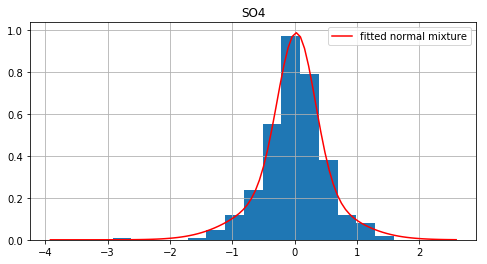

In [73]:
column = 'SO4'
data = residuals_df[residuals_df[column+'_resid'] != 0][column + '_resid'][1:]
sampled_data = data.sample(frac=1)
train_gm = sampled_data[:len(sampled_data)//2]
test_gm = sampled_data[len(sampled_data) // 2:]

fun = lambda x: gmm_pdf(x, ncomp=2, weights=[0.43, 0.57],
                            means=[[-0.03], [0.03]],
                            sigmas=[[0.75], [0.3]])

points = np.linspace(data.min() - 1, data.max() + 1,num=100)
plt.figure(figsize=(8, 4))
plt.hist(sampled_data, bins=15, density=True);
plt.plot(points, fun(points), color='r', label='fitted normal mixture')
plt.title(column)
plt.legend(loc='best')
plt.savefig(column+'_histogram.png')
plt.grid(True)

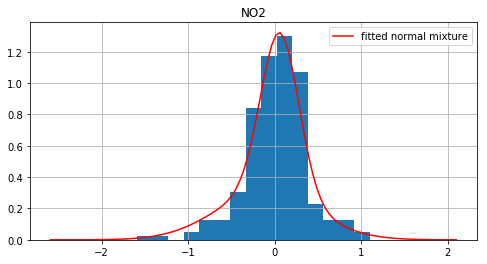

In [72]:
column = 'NO2'
data = residuals_df[residuals_df[column+'_resid'] != 0][column + '_resid'][1:]
sampled_data = data.sample(frac=1)
train_gm = sampled_data[:len(sampled_data)//2]
test_gm = sampled_data[len(sampled_data) // 2:]

fun = lambda x: gmm_pdf(x, ncomp=2, weights=[0.43, 0.57],
                            means=[[-0.11], [0.06]],
                            sigmas=[[0.57], [0.22]])

points = np.linspace(data.min() - 1, data.max() + 1,num=100)
plt.figure(figsize=(8, 4))
plt.hist(sampled_data, bins=15, density=True);
plt.plot(points, fun(points), color='r', label='fitted normal mixture')
plt.title(column)
plt.legend(loc='best')
plt.savefig(column+'_histogram.png')
plt.grid(True)

# WARM AND COLD RESIDS

In [97]:
resids = pd.read_csv("prepared_resids.csv")

In [98]:
resids.head()

,date,TSP,SO2,SO4,NO2,YY,MM,TSP_resid,SO2_resid,SO4_resid,NO2_resid
0,1983-12-01,0.0,0.0,0.0,0.0,83,12,0.0,0.0,0.0,0.0
1,1983-01-01,0.0,0.0,0.0,0.0,83,1,0.0,0.0,0.0,0.0
2,1983-02-01,0.0,0.0,0.0,0.0,83,2,0.0,0.0,0.0,0.0
3,1983-03-01,0.0,0.0,0.0,0.0,83,3,0.0,0.0,0.0,0.0
4,1983-04-01,0.0,0.0,0.0,0.0,83,4,0.0,0.0,0.0,0.0


In [99]:
column = 'TSP'

In [136]:
cond1 = resids.TSP_resid != 0
cond2 = resids.MM <= 10
cond3 = resids.MM >= 4 

0.34843930405735857

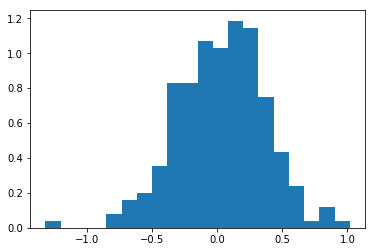

In [137]:
plt.hist(resids[cond1 & (cond2 & cond3)].TSP_resid[1:], bins=20, density=True);
resids[cond1 & (cond2 & cond3)].TSP_resid.std()

0.5358182276460547

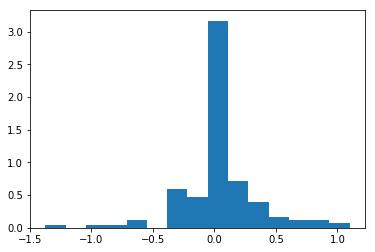

In [135]:
cond2 = resids.MM > 10
cond3 = resids.MM < 4
plt.hist(resids[cond1 & (cond2 | cond3)][column + '_resid'][1:], bins=15, density=True);
resids[cond1 & (cond2 | cond3)].TSP_resid.std()